In [245]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# === Cargar datos ===
df = pd.read_csv('../data/Train_data/train_data_cleaned.csv')
target = 'Diabetes_diagnosticated'
X = df.drop(columns=[target])
y = df[target]

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Escalado ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Cálculo automático de pesos de clase ===
pesos = class_weight.compute_class_weight(class_weight='balanced',
                                          classes=np.unique(y_train),
                                          y=y_train)
pesos = dict(enumerate(pesos))

# === Definición del modelo ===
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# === Compilar modelo ===
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === EarlyStopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# === Entrenar modelo ===
model.fit(X_train, y_train,
          epochs=100,
          batch_size=16,
          validation_split=0.2,
          class_weight=pesos,
          callbacks=[early_stop],
          verbose=1)

# === Evaluar ===
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en test: {accuracy:.2f}')


c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.7611 - loss: 0.4788 - val_accuracy: 0.8650 - val_loss: 0.3385
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8472 - loss: 0.3988 - val_accuracy: 0.8139 - val_loss: 0.4185
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8184 - loss: 0.4204 - val_accuracy: 0.8808 - val_loss: 0.3571
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8539 - loss: 0.3843 - val_accuracy: 0.8929 - val_loss: 0.3125
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8375 - loss: 0.3793 - val_accuracy: 0.8455 - val_loss: 0.3566
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8433 - loss: 0.3750 - val_accuracy: 0.8678 - val_loss: 0.3485
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8420 - loss: 0.3728 - val_accuracy: 0.9051 - val_loss: 0.3725
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8560 - loss: 0.3852 - va

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Recall

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc'), Recall(name='recall')]
)

early_stop = EarlyStopping(
    monitor='val_auc',
    patience=10,
    mode='max',
    restore_best_weights=True
)

model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=pesos,
    callbacks=[early_stop],
    verbose=1
)


c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7595 - auc: 0.8537 - loss: 0.4670 - recall: 0.7867 - val_accuracy: 0.8443 - val_auc: 0.9282 - val_loss: 0.3269 - val_recall: 0.8474
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8311 - auc: 0.9075 - loss: 0.3889 - recall: 0.8140 - val_accuracy: 0.8775 - val_auc: 0.9270 - val_loss: 0.3149 - val_recall: 0.8065
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8481 - auc: 0.9122 - loss: 0.3778 - recall: 0.7977 - val_accuracy: 0.8402 - val_auc: 0.9273 - val_loss: 0.3583 - val_recall: 0.8392
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8403 - auc: 0.9188 - loss: 0.3620 - recall: 0.8175 - val_accuracy: 0.8702 - val_auc: 0.9306 - val_loss: 0.3146 - val_recall: 0.8229
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8447 - auc: 0.9159 - loss: 0.3709 - recall: 0.8122 - val_accuracy: 0.8678 - val_auc: 0.9307 - val_loss: 0.3142 - val_recall: 0.8283
Epoch

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      2629
         1.0       0.61      0.71      0.66       453

    accuracy                           0.89      3082
   macro avg       0.78      0.82      0.80      3082
weighted avg       0.90      0.89      0.89      3082

AUC-ROC: 0.90
Average Precision (AP): 0.70


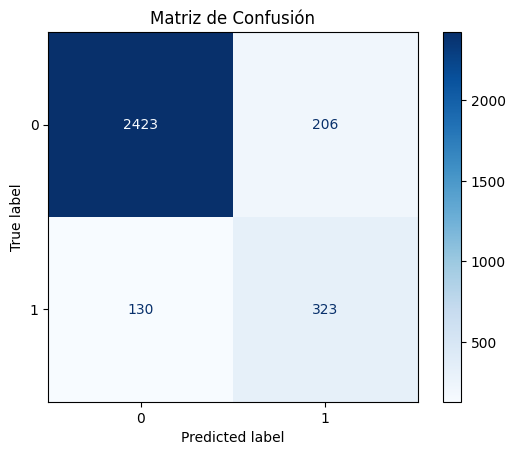

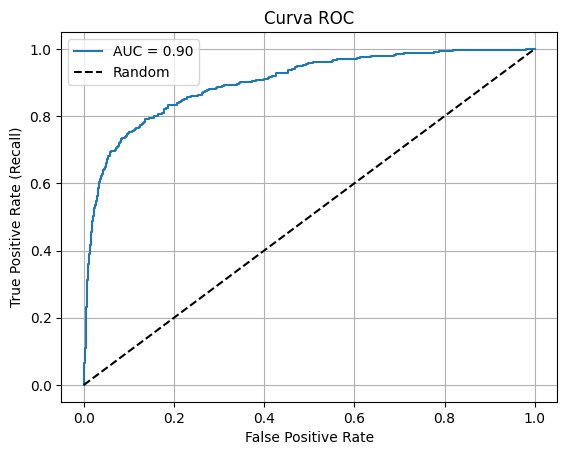

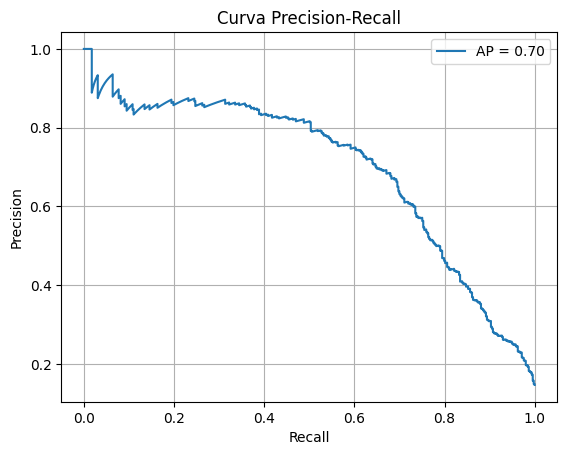

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    ConfusionMatrixDisplay, roc_curve, precision_recall_curve,
    average_precision_score
)

# === 1. PREDICCIONES ===
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# === 2. MÉTRICAS NUMÉRICAS ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

print(f"AUC-ROC: {auc:.2f}")
print(f"Average Precision (AP): {avg_precision:.2f}")

# === 3. MATRIZ DE CONFUSIÓN ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

# === 4. CURVA ROC ===
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()

# === 5. CURVA PRECISIÓN-RECALL ===
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid()
plt.show()


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      2629
         1.0       0.55      0.76      0.64       453

    accuracy                           0.87      3082
   macro avg       0.75      0.83      0.78      3082
weighted avg       0.90      0.87      0.88      3082

AUC-ROC: 0.90
Average Precision (AP): 0.70


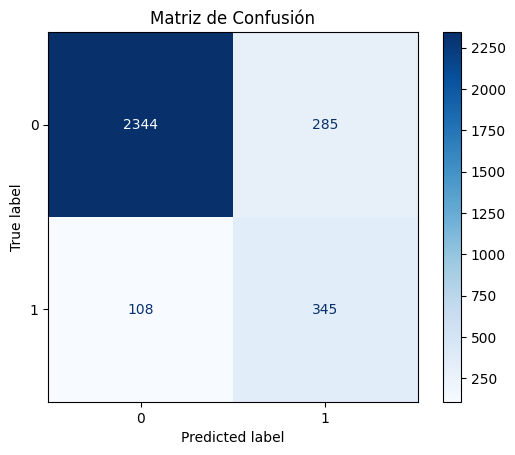

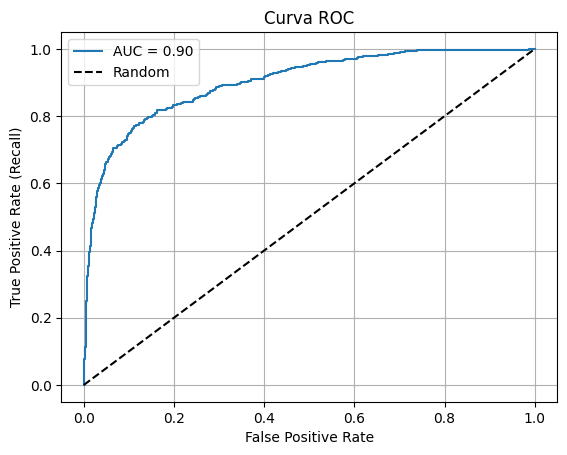

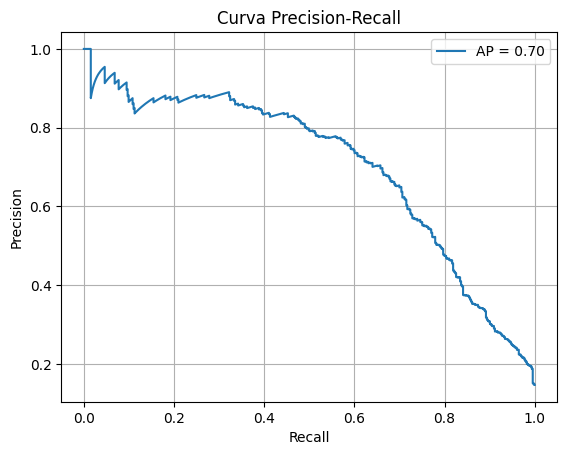

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    ConfusionMatrixDisplay, roc_curve, precision_recall_curve,
    average_precision_score
)

# === 1. PREDICCIONES ===
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# === 2. MÉTRICAS NUMÉRICAS ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

print(f"AUC-ROC: {auc:.2f}")
print(f"Average Precision (AP): {avg_precision:.2f}")

# === 3. MATRIZ DE CONFUSIÓN ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

# === 4. CURVA ROC ===
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()

# === 5. CURVA PRECISIÓN-RECALL ===
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid()
plt.show()


### DATA TO PREDICT 

In [251]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# 1️⃣ Cargar los nuevos datos (SIN el target)
new_data = pd.read_csv("../data/Prep_data/prep_data_cleaned.csv")

y_true = new_data[target].copy()  # Guardar el target original

X_prep = new_data.drop(target, axis=1)  # Quitar el target
X_prep.columns = X_prep.columns.str.replace(' ', '_')

X_prep.head()

,Gender,Age(year),Race,Country_of_birth,Income_category,Height(m),Weight(kg),HDL-Cholesterol(mmol/L),Total_Cholesterol(mmol/L),Glycohemoglobin(%),...,100_cigarrettes_life?,BMI,CHOL_ratio,Age_group,BMI_category,High_cholesterol,High_HbA1c,BMI_HbA1c,High_insulin,Cardio_risk
0,1.0,43.0,5.0,2.0,5.0,1.8034,86.182480,1.16,6.83,5.6,...,1.0,26.499328,5.887931,3.0,3.0,1,0,148.396235,1,2
1,1.0,66.0,3.0,1.0,5.0,1.7780,99.790240,1.55,5.53,5.6,...,1.0,31.566364,3.567742,4.0,4.0,0,0,176.771636,1,3
2,2.0,44.0,2.0,2.0,2.0,1.5240,68.038800,1.27,4.84,6.2,...,2.0,29.294542,3.811024,3.0,3.0,0,0,181.626160,1,0
3,1.0,34.0,1.0,1.0,2.0,1.7272,90.718400,1.19,4.73,5.1,...,1.0,30.409559,3.974790,2.0,4.0,0,0,155.088751,0,1
4,1.0,51.0,3.0,1.0,5.0,1.7780,78.925008,1.24,4.73,4.8,...,2.0,24.966124,3.814516,3.0,2.0,0,0,119.837395,0,0


In [252]:
# Asegúrate de que el scaler que usaste para X_train sigue en memoria.
X_prep_scaled = scaler.transform(X_prep)


In [253]:
# Predecir probabilidades
y_pred_proba = model.predict(X_prep_scaled)

# Convertir a etiquetas usando umbral 0.5
y_pred = (y_pred_proba >= 0.5).astype(int).ravel()  # ravel() para aplanar


192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [254]:
print(classification_report(y_true, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      5052
         1.0       0.66      0.77      0.71      1071

    accuracy                           0.89      6123
   macro avg       0.80      0.84      0.82      6123
weighted avg       0.90      0.89      0.89      6123

Matriz de confusión:
[[4619  433]
 [ 246  825]]


In [256]:
resultados = pd.DataFrame({
    'Real': y_true,
    'Predicción': y_pred,
}, index=X_prep.index)


In [257]:
resultados['Acierto'] = resultados['Real'] == resultados['Predicción']
print(resultados['Acierto'].value_counts())
print(f"Accuracy en datos nuevos: {resultados['Acierto'].mean():.2f}")

Acierto
True     5444
False     679
Name: count, dtype: int64
Accuracy en datos nuevos: 0.89


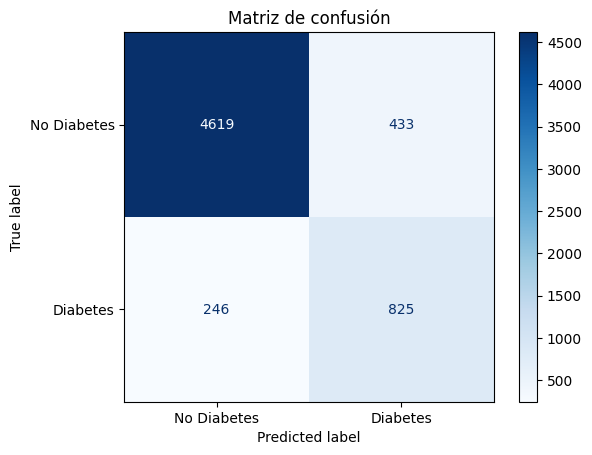

In [258]:

ConfusionMatrixDisplay.from_predictions(resultados['Real'], resultados['Predicción'], 
                                        cmap='Blues', display_labels=['No Diabetes', 'Diabetes'])
plt.title("Matriz de confusión")
plt.grid(False)
plt.show()
